# SALES ANALYSIS

#### Import necessary libraries

In [1]:
import pandas as pd
import os

#### Task1: Merging 12 months of data into a single file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")


files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv", index=False)

   




#### Read in updated DataFrame

In [3]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Clean up the data 


#### Drop rows of NAN


In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Find 'Or' and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Convert columns to the correct data type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

## Augment Data with additional columns

#### Task 2: Add month column

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Task 3: Add a sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] 
all_data.head()

 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Task 4: Add a cities column

In [9]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x)+' ('+ get_state(x)+')')
all_data.head()
all_data.to_csv('updated.csv')

####  Q1. What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby('Month').sum()
results


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [11]:
all_data.groupby(['Month']).sum()['Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

range(1, 13)


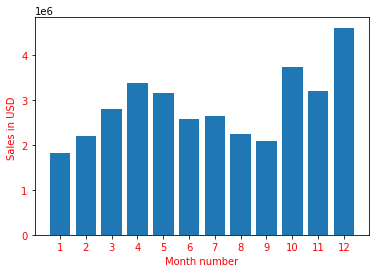

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months,color='r')
plt.yticks(color='r')
plt.ylabel('Sales in USD ',color='r')
plt.xlabel('Month number',color='r')
plt.show()


#### Q2: What city had the highest number of sales?

In [27]:
results = all_data.groupby('City').sum()
results





{'Quantity Ordered': {' Atlanta (GA)': 16602,
  ' Austin (TX)': 11153,
  ' Boston (MA)': 22528,
  ' Dallas (TX)': 16730,
  ' Los Angeles (CA)': 33289,
  ' New York City (NY)': 27932,
  ' Portland (ME)': 2750,
  ' Portland (OR)': 11303,
  ' San Francisco (CA)': 50239,
  ' Seattle (WA)': 16553},
 'Price Each': {' Atlanta (GA)': 2779908.2,
  ' Austin (TX)': 1809873.61,
  ' Boston (MA)': 3637409.77,
  ' Dallas (TX)': 2752627.82,
  ' Los Angeles (CA)': 5421435.23,
  ' New York City (NY)': 4635370.83,
  ' Portland (ME)': 447189.25,
  ' Portland (OR)': 1860558.22,
  ' San Francisco (CA)': 8211461.74,
  ' Seattle (WA)': 2733296.01},
 'Month': {' Atlanta (GA)': 104794,
  ' Austin (TX)': 69829,
  ' Boston (MA)': 141112,
  ' Dallas (TX)': 104620,
  ' Los Angeles (CA)': 208325,
  ' New York City (NY)': 175741,
  ' Portland (ME)': 17144,
  ' Portland (OR)': 70621,
  ' San Francisco (CA)': 315520,
  ' Seattle (WA)': 104941},
 'Sales': {' Atlanta (GA)': 2795498.58,
  ' Austin (TX)': 1819581.75,
  ' B

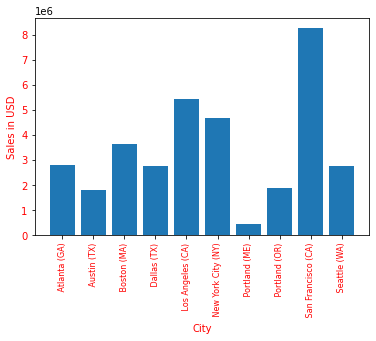

In [14]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical',size = 8,color='r')
plt.yticks(color='r')
plt.ylabel('Sales in USD',color='r')
plt.xlabel('City',color='r')
plt.show()



#### Q3. What time should we display advertisements to maximize likelihood to customer's buying product?

In [15]:
all_data["Order Date"]= pd.to_datetime(all_data['Order Date'])

In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


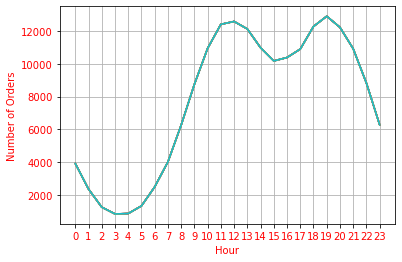

In [17]:
import matplotlib.pyplot as plt

hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel('Hour',color='r')
plt.ylabel("Number of Orders",color='r')
plt.xticks(hours,color='r')
plt.yticks(color='r')
plt.grid()
plt.show()

# My recmmendation is around 11AM (11) or 7PM(19)

#### Q4. What products are most often sold together?

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


/var/folders/m_/v__pwdkd4pgd8wttmy_nl2vc0000gn/T/ipykernel_96676/1255689996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
lst1 = []
lst2 = []

for key, value in count.most_common(10):
           lst1.append(key)
           lst2.append(value)

df = pd.DataFrame({'categories': lst1, 'count': lst2}) 
df.head()



# for key, value in count.most_common(10):
#     print(key,value)
    
# # thisdict = {}

# # for key, value in count.most_common(10):
# #            thisdict[key] = [value] ;
# # print(thisdict)

# # df = pd.DataFrame.from_dict(thisdict)
# # df.to_csv('df1.csv', index = False)
    


,categories,count
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361


In [20]:
df.to_csv('grouped.csv',index = False)

#### Q5. What product sold the most? Why do you think it sold the most

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [22]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']



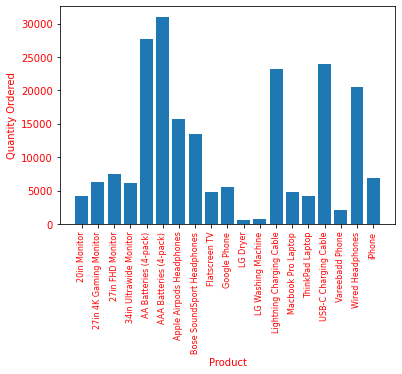

In [23]:
import matplotlib.pyplot as plt
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products,rotation='vertical',size = 8,color='r')
plt.yticks(color='r')
plt.ylabel('Quantity Ordered',color='r')
plt.xlabel('Product',color='r')
plt.show()

/var/folders/m_/v__pwdkd4pgd8wttmy_nl2vc0000gn/T/ipykernel_96676/1383922659.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size = 8,color='r')
/var/folders/m_/v__pwdkd4pgd8wttmy_nl2vc0000gn/T/ipykernel_96676/1383922659.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(products,rotation='horizontal',color='g')
/var/folders/m_/v__pwdkd4pgd8wttmy_nl2vc0000gn/T/ipykernel_96676/1383922659.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(products,rotation='horizontal',color='b')


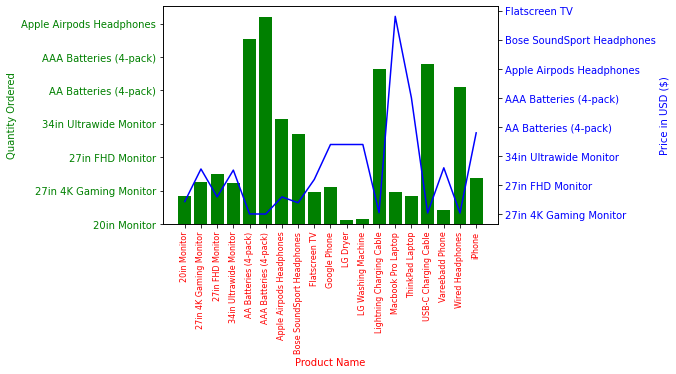

In [24]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color = 'g')
ax2.plot(products, prices, 'b-')


ax1.set_xlabel('Product Name',color = 'r')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD ($)', color='b')
ax1.set_xticklabels(products,rotation='vertical',size = 8,color='r')
ax1.set_yticklabels(products,rotation='horizontal',color='g')
ax2.set_yticklabels(products,rotation='horizontal',color='b')
plt.show()